# Title: Employee Attrition Analysis & Prediction

---

## Objective
 To analyze HR data and build a predictive model that determines whether an employee is likely to leave the company. The project also aims to identify key factors contributing to employee attrition, enabling data-driven strategies to improve retention.

___

## Dataset  
**Source:** [Kaggle - HR Analytics and Job Prediction](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)  
**Size:** ~15,000 rows, 10 columns  
**Description:** Contains employee satisfaction level, last evaluation, number of projects, average monthly hours, time spent at the company, work accident history, promotion status, department, salary level, and whether the employee left the company (attrition status).
Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

---

## **Imports**
* Import Packages
* Load dataset

### **Import Required Libraries**


Load all the essential Python libraries used in this project, grouped by their purpose:

- **Operational Packages**: Data manipulation, numerical operations, and model persistence.

- **Visualization Packages**: Creating plots, charts, and feature importance visualizations.

- **Machine Learning Packages**: Building, training, and tuning models.

- **Model Evaluation Packages**: Assessing model performance with classification metrics and confusion matrices.

In [2]:
# --------------------------
# Operational Packages
# --------------------------
import pandas as pd
import numpy as np
import pickle

# --------------------------
# Visualization Packages
# --------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# --------------------------
# Machine Learning Packages
# --------------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# --------------------------
# Model Evaluation Packages
# --------------------------
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)


---

### **Load and Preview Dataset**

Import the HR dataset into a pandas DataFrame and display the first few rows to understand its structure and contents. This helps verify that the file is loaded correctly and provides an initial look at the available columns and data types.

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


---

## **Initail EDA and Data Cleaning**


- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

### **Check Dataset Information**

Display a concise summary of the dataset, including column names, data types, and non-null counts. This helps identify data completeness, detect missing values, and understand the structure before proceeding with analysis.

In [4]:
# Display concise summary of the dataframe:
# - Column names
# - Data types
# - Non-null counts (to check for missing values)
# - Memory usage
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Output Summary:**

- Rows & Columns: 14,999 rows × 10 columns

- Data Types: 2 float, 6 integer, 2 object (categorical)

- Missing Values: None (all columns have 14,999 non-null entries)

- Memory Usage: ~1.1 MB



---

###  **Statistical Summary of Dataset** 
Generate descriptive statistics for all columns, including numerical and categorical variables. This step provides key insights such as mean, median, standard deviation, minimum and maximum values, unique categories, and most frequent values.

In [5]:
# Display descriptive statistics for all columns
# include="all" ensures both numeric and categorical columns are summarized
df0.describe(include="all")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**Output Summary:**

1. Numerical Columns:

    - Satisfaction Level: Avg = 0.61, spread from 0.09 to 1.00

    - Last Evaluation: Avg = 0.72, spread from 0.36 to 1.00
    
    - Number of Projects: Median = 4, range = 2–7
    
    - Average Monthly Hours: Avg ≈ 201 hrs, range = 96–310 hrs
    
    - Time Spent in Company: Avg ≈ 3.5 years, max = 10 years
    
    - Work accidents are rare (~14% occurrence), promotions in last 5 years are very rare (~2.1%).  


2. Categorical Columns:

    - Department: 10 unique values, most common = sales (4,140 employees)

    - Salary: 3 unique values, most common = low (7,316 employees)  
    

3. No missing values detected in any column.

---

### **Clean and Standardize Column Names**

Convert all column names to lowercase and rename them for brevity and clarity. This improves readability, makes them easier to reference in code, and ensures consistency across the project.

In [6]:
# Convert all column names to lowercase
df0.columns = df0.columns.str.lower()

# Rename columns for brevity and clarity
df0.rename(columns={
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'num_projects',
    'average_montly_hours': 'avg_monthly_hrs',
    'time_spend_company': 'tenure',
    'work_accident': 'accident',
    'promotion_last_5years': 'promotion',
    'department': 'dept'
    # 'salary' remains unchanged
}, inplace=True)

# Display updated column names
df0.columns


Index(['satisfaction', 'evaluation', 'num_projects', 'avg_monthly_hrs',
       'tenure', 'accident', 'left', 'promotion', 'dept', 'salary'],
      dtype='object')

**Output Summary:**

- All column names are now lowercase.

- Renamed for clarity:

    `"satisfaction_level"` → `"satisfaction"`

    `"last_evaluation"` → `"evaluation"`

    `"number_project"` → `"num_projects"`

    `"average_montly_hours"` → `"avg_monthly_hrs"`

    `"time_spend_company"` → `"tenure"`

    `"work_accident"` → `"accident"`

    `"promotion_last_5years"` → `"promotion"`

    `"department"` → `"dept"`

- Final column list:  

    [`'satisfaction'`, `'evaluation'`, `'num_projects'`, `'avg_monthly_hrs'`, `'tenure'`, `'accident'`, `'left'`, `'promotion'`, `'dept'`, `'salary'`]

---

### **Check for Missing Values**

Verify if any columns in the dataset contain missing (NaN) values. This helps identify potential data cleaning requirements before analysis or modeling.

In [7]:
# Check for missing values in each column
# Returns True if a column has any NaN values, otherwise False
df0.isna().any()


satisfaction       False
evaluation         False
num_projects       False
avg_monthly_hrs    False
tenure             False
accident           False
left               False
promotion          False
dept               False
salary             False
dtype: bool

**Output Summary:**

- All columns returned False, indicating no missing values in the dataset.

- No imputation or removal of missing data is required at this stage.

---

### **Check for Duplicate Rows**

Determine if the dataset contains any duplicate rows. Duplicates can bias analysis and should be handled during data cleaning.

In [8]:
# Check if any rows in the dataframe are duplicates
# Returns True if at least one duplicate row exists
df0.duplicated().any()

np.True_

**Output Summary:**

- Output: `True` → The dataset contains duplicate rows.

- Next step: Inspect duplicate rows

---

### **Inspect Duplicate Rows**

Display rows in the dataset that are duplicates of earlier entries. Reviewing these helps verify whether the duplication is valid or accidental before removal.

In [9]:
# Display all rows that are duplicates
# This helps to manually inspect and confirm if they need removal
df0[df0.duplicated()]

,satisfaction,evaluation,num_projects,avg_monthly_hrs,tenure,accident,left,promotion,dept,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Output Summary:**

Displays the duplicate rows in full for manual review.

These rows will be removed in the next step to avoid bias in analysis.

---

### **Remove Duplicate Rows**

Remove all duplicate rows from the dataset to ensure accuracy and prevent skewed analysis. Store the cleaned data in a new DataFrame for further processing.

In [10]:
# Remove duplicate rows from the dataframe
# Store the cleaned data in a new DataFrame to preserve the original
df1 = df0.drop_duplicates().copy()

# Display the first few rows of the cleaned dataset
df1.head()

,satisfaction,evaluation,num_projects,avg_monthly_hrs,tenure,accident,left,promotion,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Output Summary:**

- Duplicate rows successfully removed.

- New DataFrame df1 contains only unique rows.
 
- First few rows confirm data structure and column order remain unchanged.

---

### **Outlier Detection and Analysis**
Using Boxplots and the IQR Method to Visualize and Flag Outliers

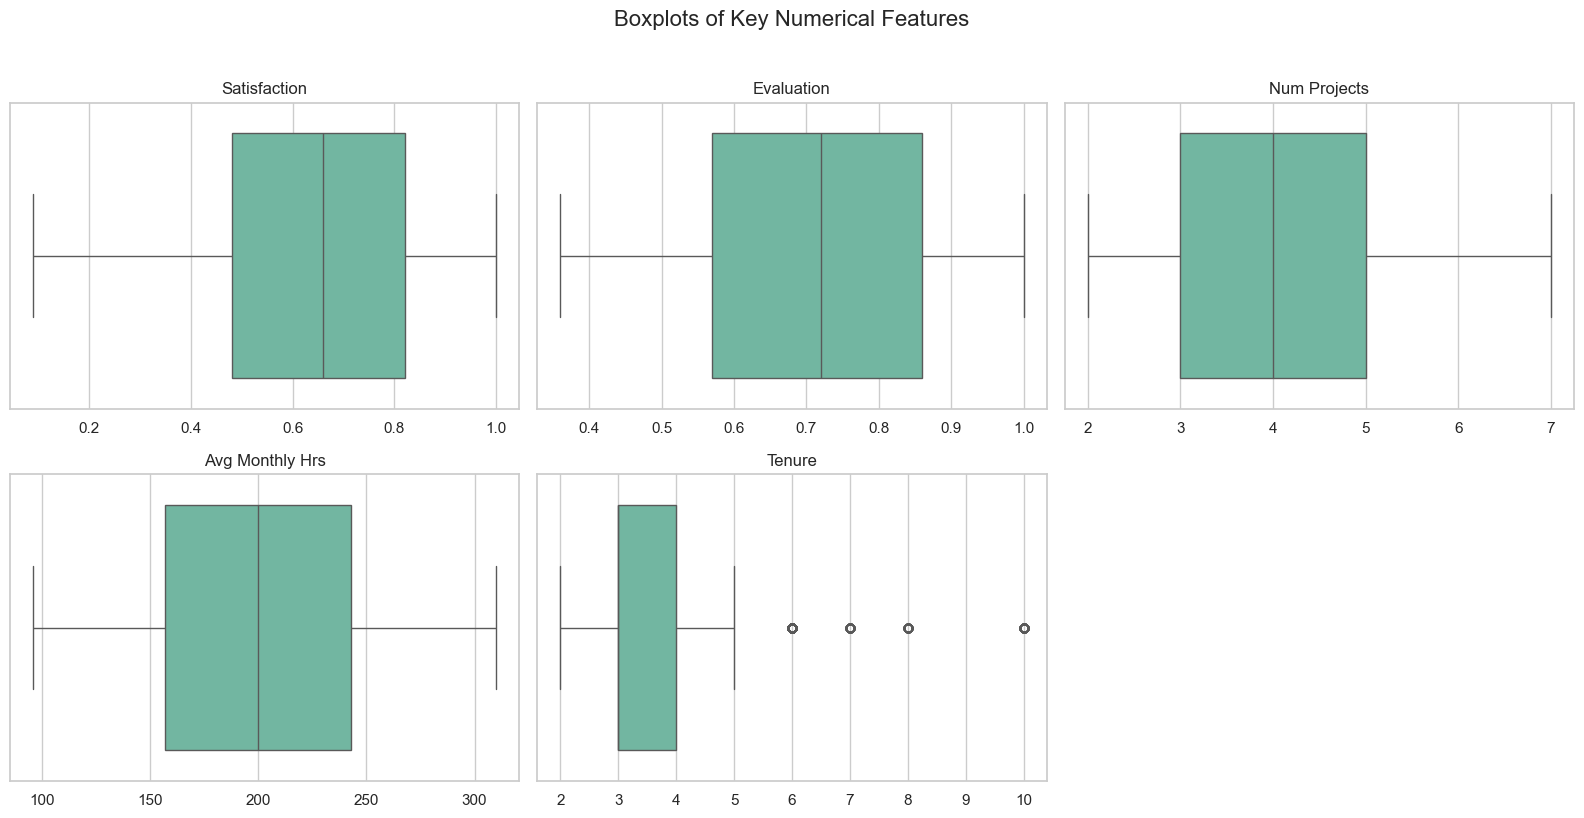

In [11]:
# 🎯 Boxplots to visualize distributions and detect outliers in key numerical columns

# Selected columns for outlier detection
outliers_cols = ["satisfaction", "evaluation", "num_projects", "avg_monthly_hrs", "tenure"]

# Set plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.suptitle("Boxplots of Key Numerical Features", fontsize=16, y=1.02)

# Loop through each column and create a subplot
for i, col in enumerate(outliers_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows x 3 columns
    sns.boxplot(x=df1[col], color='#66c2a5')
    plt.title(f"{col.replace('_', ' ').title()}", fontsize=12)
    plt.xlabel("")

plt.tight_layout()
plt.show()


In [12]:
# Determine the number of rows containing outliers in 'tenure'.
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df1[df1["tenure"] > upper]
outliers

,satisfaction,evaluation,num_projects,avg_monthly_hrs,tenure,accident,left,promotion,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


#### **Outlier Detection Results and Next Steps**
- Using boxplots and the IQR method, a total of 824 outlier records were identified across the selected numerical features.
- Most of these occur in tenure, representing employees with unusually long service (≥ 6 years).
- These records have been stored in a separate dataframe for further review.
- A decision on whether to remove or retain them will be made during the model selection phase to ensure the best predictive performance for the left variable.

---

## **Further EDA and Visualisatoins**

Perform deeper exploratory data analysis to uncover patterns, relationships, and insights within the dataset. Use visualizations to better understand the distribution of variables, correlations, and trends that may impact employee attrition.

### **Visualize Class Balance**

Examine the distribution of the target variable (left) to identify class imbalance. A countplot shows the number of employees who stayed vs. left, and a pie chart displays their proportions. This helps determine if class balancing techniques (e.g., SMOTE) are needed before modeling.


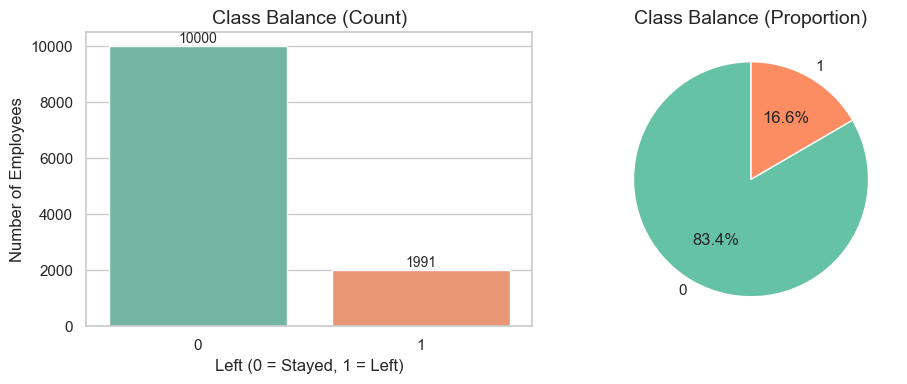

In [13]:
# Count the occurrences of each class in the target variable
class_counts = df1['left'].value_counts()

# Create side-by-side subplots for countplot and pie chart
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Countplot ---
sns.countplot(ax=axes[0], x='left', data=df1, palette='Set2', hue="left", legend=False)
axes[0].set_title('Class Balance (Count)', fontsize=14)
axes[0].set_xlabel('Left (0 = Stayed, 1 = Left)')
axes[0].set_ylabel('Number of Employees')

# Annotate counts above bars
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width()/2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# --- Pie Chart ---
axes[1].pie(class_counts, 
            labels=class_counts.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette('Set2'))
axes[1].set_title('Class Balance (Proportion)', fontsize=14)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


**Interpretation**:  
The target variable left shows that 83.4% of employees stayed and 16.6% left.
This distribution indicates a moderate class imbalance but remains within the acceptable range (above the common 90–10 threshold), so no rebalancing techniques were applied before modeling.

---

### **Distribution of Numerical Features**

Visualize the distribution of each numerical variable to detect skewness, multimodality, and unusual patterns. This helps identify possible data transformations or outliers before modeling.


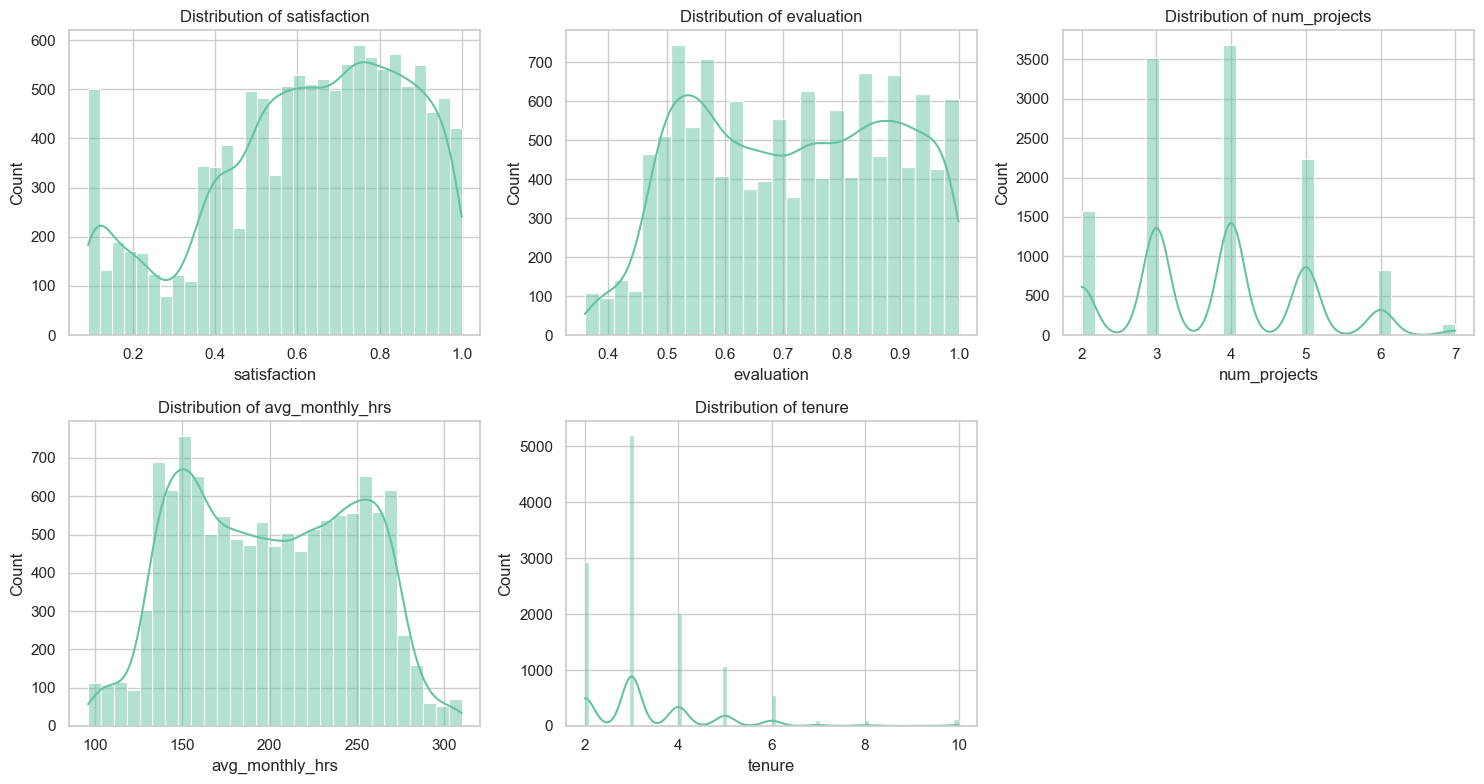

In [14]:
# List of numerical columns to visualize
num_cols = ['satisfaction', 'evaluation', 'num_projects', 
            'avg_monthly_hrs', 'tenure']

# Set figure size for all subplots
plt.figure(figsize=(15, 8))

# Loop through each numerical column and plot histogram with KDE
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Arrange plots in 2 rows, 3 columns
    sns.histplot(x=df1[col], kde=True, color='#66c2a5')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Observations:**

- Satisfaction: Bimodal distribution — clusters of low and high satisfaction.
 
- Evaluation: Slightly uniform with peaks at mid-to-high values.
 
- Number of Projects: Strong peaks at 2, 3, 4, 5 projects — possible company policy or workload grouping.
 
- Average Monthly Hours: Spread across range, peaks around ~150 and ~250 hours — possible high/low workload categories.
 
- Tenure: Heavily right-skewed, most employees have 2–3 years tenure.

---

### **Distribution of Categorical Features**


Count plots of categorical variables reveal frequency distribution, highlighting imbalances in salary levels and departmental composition.

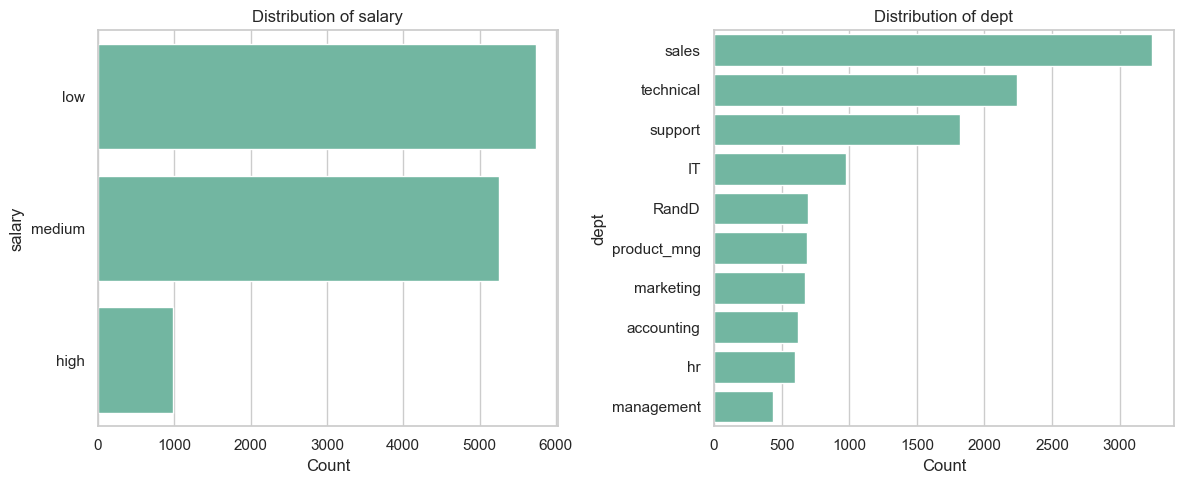

In [15]:
# List of categorical columns to visualize
cat_cols = ['salary', 'dept']

# Set figure size for plots
plt.figure(figsize=(12, 5))

# Loop through each categorical column and create count plots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 2, i)  # 1 row, 2 columns layout
    sns.countplot(
        y=col, 
        data=df1,
        order=df1[col].value_counts().index,  # Order by frequency
        color='#66c2a5'
    )
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


**Observations:**

- Salary: Majority of employees are in the low and medium salary bands, with few in high salary.

- Department: Sales and Technical departments dominate the workforce, followed by Support and IT. Management and HR have the smallest representation.

---

### **Distribution of Numeric Features by Employee Attrition**


Boxplots visualize the relationship between numeric features and attrition status (left). They help detect patterns in employee characteristics (e.g., satisfaction, evaluation) that may influence the likelihood of leaving.

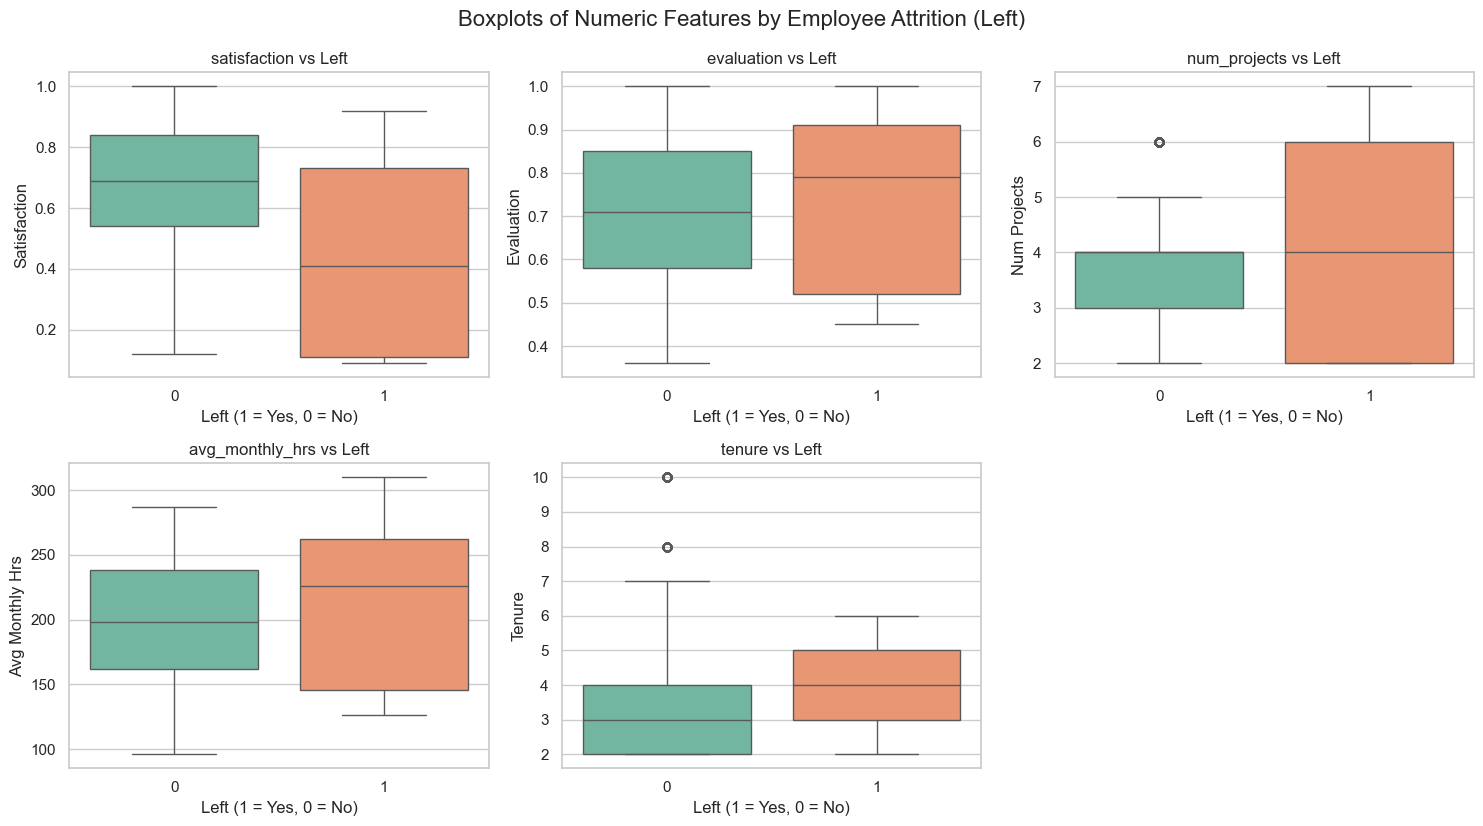

In [16]:
num_cols = ['satisfaction', 'evaluation', 'num_projects',
            'avg_monthly_hrs', 'tenure']

plt.figure(figsize=(15, 8))  # Wider canvas for all plots

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(x='left', y=col, data=df1, palette='Set2', hue='left', legend=False)
    plt.title(f'{col} vs Left')
    plt.xlabel('Left (1 = Yes, 0 = No)')
    plt.ylabel(col.replace('_', ' ').title())



plt.tight_layout()
plt.suptitle('Boxplots of Numeric Features by Employee Attrition (Left)', fontsize=16, y=1.03)
plt.show()


---

#### **Insights from Plotted Graphs**
 **1. Satisfaction vs. Left**

* Employees who stayed (0) generally had higher satisfaction levels (median ≈ 0.65–0.7).
* Employees who left (1) had a much wider spread but a lower median (≈ 0.4).
* This suggests low satisfaction is strongly linked to attrition.


**2. Evaluation vs. Left**

* Leavers (1) tend to cluster at both high and moderate evaluation scores, but their median (\~0.78) is slightly higher than stayers (\~0.7).
* This might indicate that very high performers are also leaving, possibly due to overwork or lack of recognition.


 **3. Number of Projects vs. Left**

* Employees who left often had more projects (median \~4, but many at 6–7).
* Those who stayed mostly had 3–4 projects.
* Workload intensity may be a contributing factor to attrition.


 **4. Average Monthly Hours vs. Left**

* Leavers generally worked more hours per month (median \~240 vs. \~200 for stayers).
* This aligns with the earlier project count finding — higher workload is a risk factor for leaving.


**5. Tenure vs. Left**
- Employees who left had a slightly higher median tenure (\~4 years) compared to stayers (\~3 years).
- Indicates attrition often occurs after a few years, possibly due to career plateau, lack of promotions, burnout, or better opportunities elsewhere.


 **Key Insights**

* Low satisfaction and high workload (projects + hours) are strong predictors of attrition.
* High-performing employees are also leaving, which is a red flag — possibly related to burnout or lack of reward.
* Early tenure attrition highlights onboarding, engagement, and retention issues.


---

### **Attrition Distribution Across Categorical Variables**

This visualization shows how employee attrition (left) varies across key categorical variables (salary and dept). By using percentage-based histograms, it becomes easier to compare the proportion of employees who stayed versus those who left within each category.

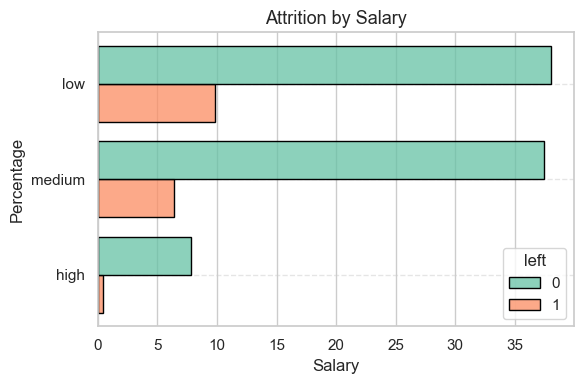

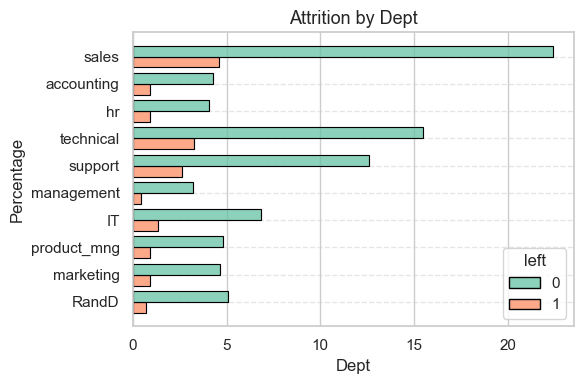

In [17]:
# List of categorical columns to analyze
cat_cols = ['salary', 'dept']

# Loop through each categorical column to plot attrition distribution
for col in cat_cols:
    plt.figure(figsize=(6, 4))  # Set figure size for clarity
    
    # Create histogram with percentage on the y-axis
    sns.histplot(
        data=df1,
        y=col,                   # Categorical variable to plot on Y-axis
        hue='left',              # Separate colors based on attrition
        stat='percent',          # Show results in percentage form
        multiple='dodge',        # Separate bars for each attrition category
        shrink=0.8,               # Slightly shrink bars for better spacing
        palette='Set2',          # Soft color palette
        edgecolor='black'        # Add borders to bars for better visibility
    )

    # Add titles and labels
    plt.title(f'Attrition by {col.capitalize()}', fontsize=13)
    plt.xlabel(col.capitalize())
    plt.ylabel("Percentage")
    
    # Format layout and add gridlines for easier reading
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Show the plot
    plt.show()


### Insights from Plotted Graphs

1. **Salary vs Left**:
    - Employees with low salaries are more likely to leave the company compared to those with medium or high salaries.
    - This indicates that compensation is a strong factor influencing retention — employees with lower pay are more likelyto seek opportunities elsewhere, possibly for better financial incentives.

2. **Department vs Left**:
    - Attrition is highest in the sales and technical departments, followed by support. Departments like management,marketing, and R&D show comparatively lower attrition rates.
    - This suggests that certain roles — particularly in sales, technical, and support — may have higher work pressure, lowersatisfaction, or more external job opportunities, making them more prone to employee turnover.

These insights suggest that factors such as salary and department play significant roles in employee attrition.Addressing these factors could help improve retention rates.

---

### **Attrition Rate by Department**

This bar plot shows the percentage of employees who left in each department. The attrition rate is calculated as the mean of the left variable for each department, multiplied by 100. This helps identify which departments have the highest employee turnover and may require attention for retention strategies.

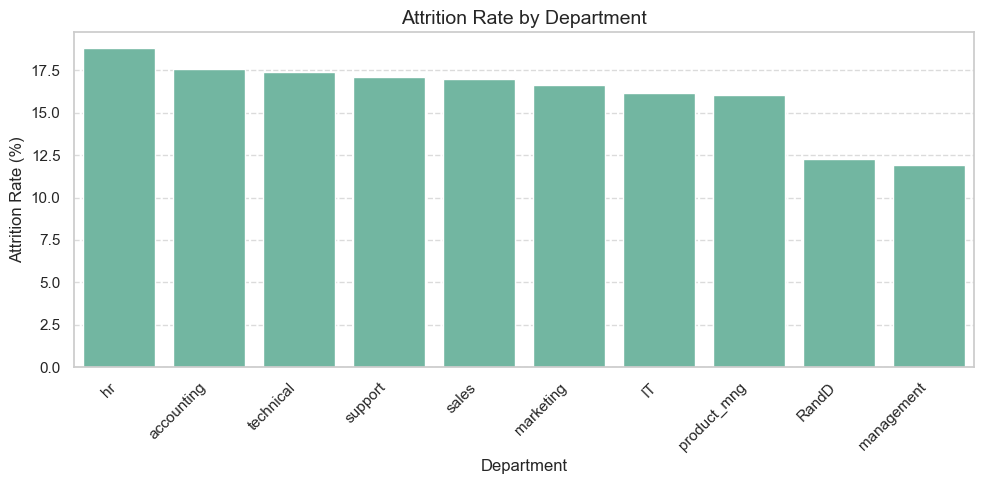

In [18]:
# Calculate attrition rate (%) for each department
attrition_by_dept = df1.groupby("dept")["left"].mean().sort_values(ascending=False) * 100
attrition_by_dept = attrition_by_dept.round(2)  # Round to 2 decimal places for neatness

# Create bar plot
plt.figure(figsize=(10, 5))  # Set plot size
sns.barplot(
    x=attrition_by_dept.index,       # Department names
    y=attrition_by_dept.values,      # Corresponding attrition rates
    color='#66c2a5',                 # Soft green color
    legend=False
)

# Add plot titles and labels
plt.title('Attrition Rate by Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add horizontal gridlines for easier comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Observation**:
- HR shows the highest attrition rate, followed by accounting, technical, and support. Management and R\&D have the lowest rates, suggesting department-specific factors influence retention.


---

### **Relationship Between Number of Projects, Satisfaction, and Workload by Attrition**

These boxplots compare employee satisfaction levels and average monthly hours across different numbers of projects, split by whether employees left the company or not. This visualization highlights how workload intensity and satisfaction interact with attrition patterns.

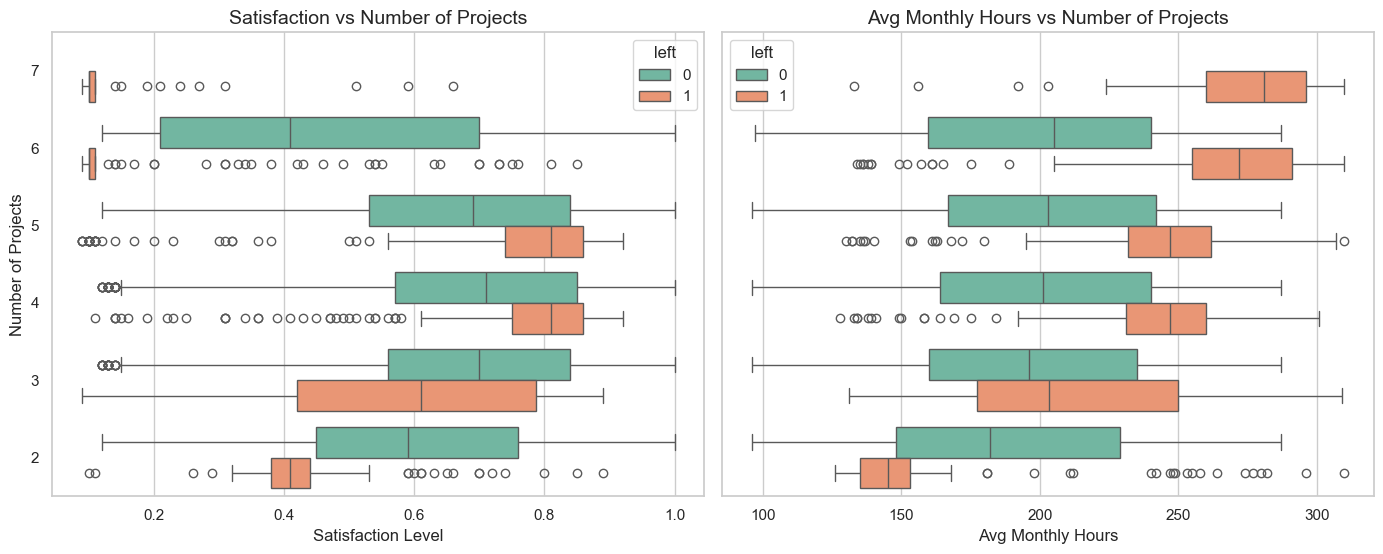

In [19]:
# Set plot style
sns.set(style="whitegrid")

# Define the order of categories explicitly in descending order
project_order = sorted(df1['num_projects'].unique(), reverse=True)  # [7,6,5,4,3,2]

# Create figure with 2 horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot 1: Satisfaction vs Number of Projects by Attrition
sns.boxplot(
    data=df1,
    x='satisfaction',
    y='num_projects',
    hue='left',
    orient='h',
    palette='Set2',
    order=project_order,  # Set custom order here
    ax=axes[0]
)
axes[0].set_title("Satisfaction vs Number of Projects", fontsize=14)
axes[0].set_xlabel("Satisfaction Level", fontsize=12)
axes[0].set_ylabel("Number of Projects", fontsize=12)

# Boxplot 2: Avg Monthly Hours vs Number of Projects by Attrition
sns.boxplot(
    data=df1,
    x='avg_monthly_hrs',
    y='num_projects',
    hue='left',
    orient='h',
    palette='Set2',
    order=project_order,  # Set custom order here too
    ax=axes[1]
)
axes[1].set_title("Avg Monthly Hours vs Number of Projects", fontsize=14)
axes[1].set_xlabel("Avg Monthly Hours", fontsize=12)
axes[1].set_ylabel("")  # No need to repeat ylabel

# Place legend outside the plots for clarity
handles, labels = axes[1].get_legend_handles_labels()
# fig.legend(handles, labels, title="Left Company", loc='upper center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # type: ignore # Adjust layout to fit legend
plt.show()


#### **Observations**

**Satisfaction vs. Number of Projects**
- This graph shows that employees who left (left = 1, in orange) had a lower median satisfaction level compared to employees who stayed (left = 0, in green), across all project counts.

- Far employees with 2, 6, or 7 projects, those who left had a dramatically lower satisfaction level, with a median satisfaction score of less than 0.5.

- For employees with 3, 4, or 5 projects, the satisfaction levels were closer, but the employees who left still had a lower median score.

- The biggest gap in satisfaction is seen in employees with 6 projects, where the median satisfaction for those who left is approximately 0.3, while the median for those who stayed is around 0.7.

**Avg Monthly Hours vs. Number of Projects**
- This graph highlights a clear trend: employees who left (left = 1, in orange) worked more monthly hours on average than those who stayed (left = 0, in green), especially for a specific number of projects.

- Employees who left and had 3, 4, or 5 projects worked significantly longer hours, with a median of over 250 hours per month.

- In contrast, those who stayed with 3, 4, or 5 projects worked fewer hours, with a median below 225 hours.

- The data suggests that for employees with 6 or 7 projects, the average monthly hours are high for both groups, but the ones who left are clustered at the highest end of hours worked, indicating a potential burnout factor.

---

### **Satisfaction vs Average Monthly Hours by Attrition**

This scatter plot visualizes the relationship between employee satisfaction levels and average monthly working hours, differentiated by attrition status. Each point represents an employee, with colors indicating whether they left the company or stayed. Patterns in clustering may reveal workload and satisfaction trends linked to attrition.

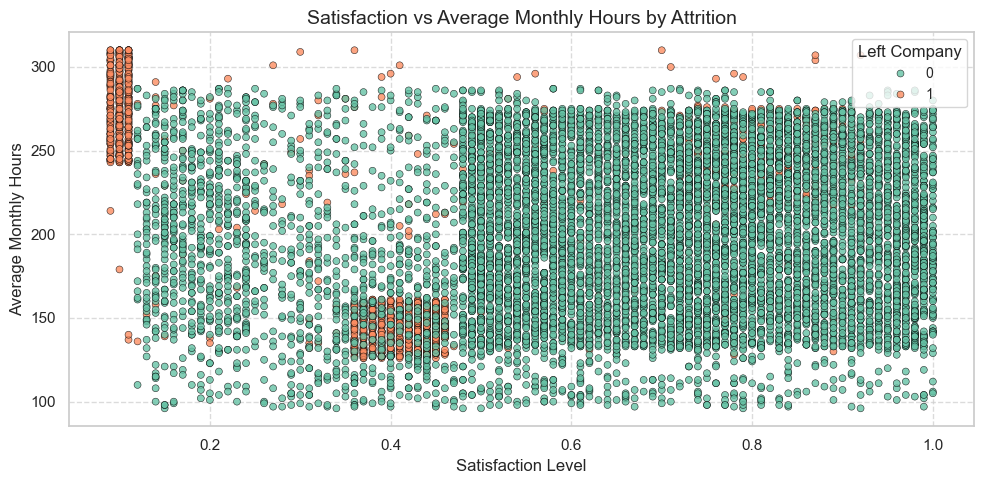

In [20]:
plt.figure(figsize=(10, 5))  # Adjust figure size for better visibility
sns.set(style="whitegrid")  # Set a clean grid style

sns.scatterplot(
    data=df1,
    x="satisfaction",
    y="avg_monthly_hrs",
    hue="left",
    palette="Set2",  # Use a visually appealing color palette
    alpha=0.8,  # Adjust transparency for better readability
    edgecolor="black",  # Add edge color to markers
    s=25
)

# Add labels and title
plt.title("Satisfaction vs Average Monthly Hours by Attrition", fontsize=14)
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("Average Monthly Hours", fontsize=12)

# Improve legend
plt.legend(title="Left Company", loc="upper right", fontsize=10)

# Add gridlines for better readability
plt.grid(axis="both", linestyle="--", alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### ****Observations****

**Key Attrition Clusters**
- The most striking observation is that employees who left the company (Left Company = 1, in orange) tend to fall into three distinct clusters, suggesting three key reasons for turnover.

- The "Unhappy & Overworked" Cluster: This is the large group of orange data points in the top-left corner. These employees have very low satisfaction levels (below 0.2) but are working extremely long hours (over 250 hours per month). This indicates a classic case of employee burnout.

- The "Low-Satisfaction & Underworked" Cluster: This group is located in the bottom-middle of the plot. These employees have moderate-to-low satisfaction levels (around 0.4) and are working relatively few hours (around 150 hours per month). This suggests they may be bored, underutilized, or feel a lack of purpose, leading them to leave.

- The "Happy & Overworked" Cluster: This cluster is less defined but visible as a vertical line of orange points on the far right. These employees have high satisfaction levels (above 0.7) but are working very long hours (over 250 hours per month). This group might have left not due to dissatisfaction with the work itself, but due to the unsustainable workload.

**Employees Who Stayed**
- Employees who stayed (Left Company = 0, in teal) are concentrated in a large, well-defined group with moderate to high satisfaction (from 0.5 to 1.0) and a manageable workload (around 150-250 hours per month). This "sweet spot" represents the ideal balance for employee retention.

---

### **Number of Projects by Tenure and Attrition**

This horizontal bar plot shows how the average number of projects varies across different tenure levels, with a comparison between employees who left and those who stayed.

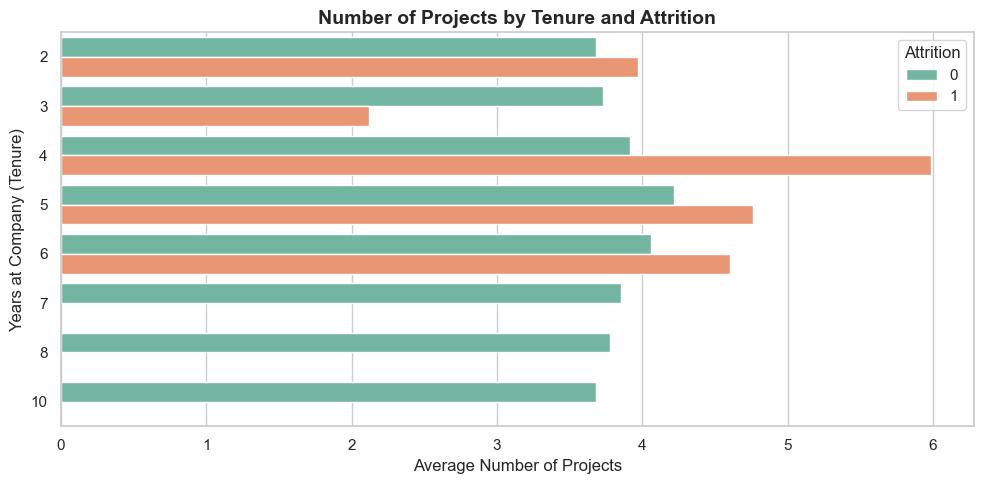

In [21]:
plt.figure(figsize=(10, 5))  # Adjust figure size

sns.barplot(
    data=df1,
    x="num_projects",
    y="tenure",
    hue="left",
    orient="h",
    palette="Set2",
    errorbar=None
)

# Titles and labels
plt.title("Number of Projects by Tenure and Attrition", fontsize=14, fontweight='bold')
plt.xlabel("Average Number of Projects", fontsize=12)
plt.ylabel("Years at Company (Tenure)", fontsize=12)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


#### **Observation**
- The graph reveals a clear and interesting pattern: the risk of attrition is highest among employees with a high number of projects relative to their tenure, but there's an exception for employees with 3 years of tenure.

- Mid-Career Burnout: For employees with 4, 5, and 6 years of tenure, those who left (Attrition = 1, in orange) had a significantly higher average number of projects than those who stayed (Attrition = 0, in green). This suggests that excessive workload during the mid-career stage is a strong driver of attrition.

- The most striking example is at 4 years of tenure, where those who left had an average of 6 projects, while those who stayed had only about 4. This indicates a potential burnout factor.

- The Underutilization Factor: The pattern is completely reversed for employees with 3 years of tenure. Here, the employees who left had a much lower average number of projects (around 2) than those who stayed (nearly 4). This suggests that for this group, attrition may be caused by a feeling of being underutilized or lacking growth opportunities.

- Early Career & Long-Term Loyalty: For employees with 2 years of tenure, the average number of projects is similar for both groups, implying project load isn't a primary factor for early attrition. Similarly, the graph shows no orange bars for tenures of 7, 8, and 10 years, which indicates that employees who stay this long have very low, if any, attrition rates.

---

### ****Correlation Heatmap****
Visualizes the pairwise correlation between numerical variables in the dataset, highlighting the strength and direction of their relationships.

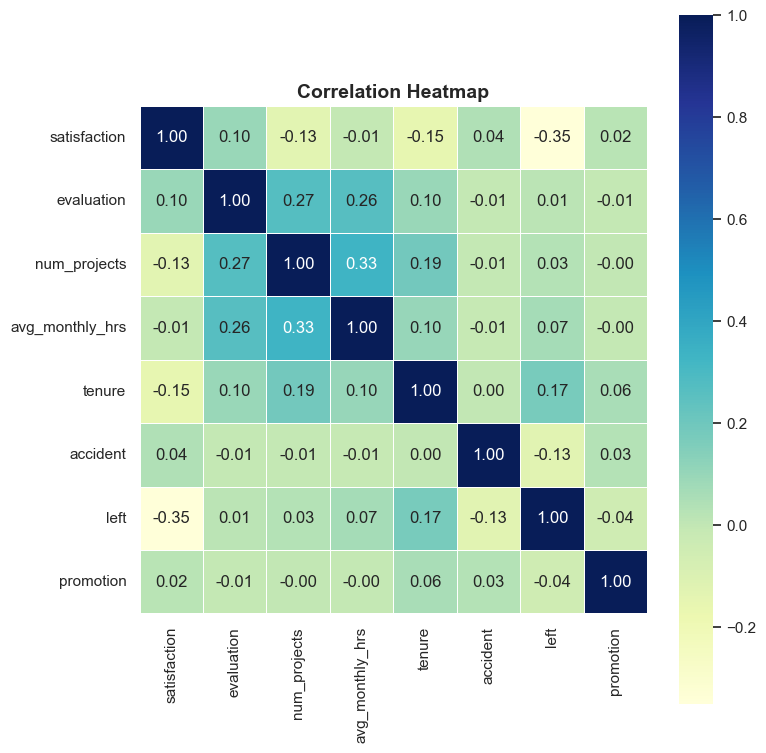

In [22]:
# Calculate correlation matrix
corr = df1.corr(numeric_only=True)  # Avoids errors with non-numeric columns

# Set figure size
plt.figure(figsize=(8, 8))

# Create heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, square=True,)

# Title
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


#### **Observations**:  
- Lower employee satisfaction is strongly correlated with higher attrition (r = -0.35), suggesting that dissatisfaction is a key driver of employee turnover.

- Employees handling more projects and working longer hours tend to receive higher evaluations, indicating that workload and performance are somewhat linked (num_projects ↔ avg_monthly_hrs = 0.33, evaluation ↔ avg_monthly_hrs = 0.26).



---

## **Model Building**

For this project on predicting employee attrition, I chose Logistic Regression as the initial model for three main reasons:

- Natural Fit for Binary Classification
The task is to classify employees into two groups — leave (1) or stay (0). Logistic Regression is well-suited for binary classification, producing direct probability estimates that clearly indicate attrition risk.

- Simplicity and Interpretability
As a linear model, it’s easy to implement and explain. Coefficients reveal how each feature (e.g., salary, job satisfaction, tenure) affects the likelihood of attrition, providing actionable business insights.

- Baseline for Performance
It establishes a clear benchmark using metrics like accuracy, precision, recall, and F1-score. This allows for fair comparison when testing more complex models (Decision Trees, Random Forests, Gradient Boosting) later.

In summary, Logistic Regression offers simplicity, interpretability, and relevance to this binary classification problem, making it an ideal starting point and benchmark for the project.

___

### **Data Preparation**

#### **Removing outliers**
Outliers can significantly distort the coefficient estimates in logistic regression, leading to reduced predictive accuracy. Since logistic regression is sensitive to extreme values, all identified outliers in the dataset were removed prior to model training. This ensures the model is built on clean, representative data, resulting in more stable and reliable predictions.

In [23]:
# Print the original shape of the dataset (rows, columns)
print(df1.shape)  

# Remove rows corresponding to outlier indices
df1_cleaned = df1.drop(index=outliers.index)  

# Print the shape after removing outliers
print(df1_cleaned.shape)  


(11991, 10)
(11167, 10)


##### **Output Summary:**

- Original dataset: 11,991 rows × 10 columns

- After removing outliers: 11,167 rows × 10 columns
 
- 824 rows were removed.

---

#### **Salary Encoding and Department One-Hot Encoding**

This code transforms the salary column from categorical values (low, medium, high) into numeric ordinal values and applies one-hot encoding to the dept column for machine learning readiness.

In [24]:
# Map ordinal values for salary
ordinal_mapping = {'low': 0, 'medium': 1, 'high': 2}  
df1_cleaned['salary'] = df1['salary'].map(ordinal_mapping)

# Apply one-hot encoding to 'dept' column (drop_first=True avoids dummy variable trap)
df1_lr = pd.get_dummies(df1_cleaned, drop_first=True, dtype='int', columns=["dept"])

# Display first few rows of transformed dataset
df1_lr.head()

,satisfaction,evaluation,num_projects,avg_monthly_hrs,tenure,accident,left,promotion,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


##### **Output Summary:**
The salary column is now numeric (0, 1, 2) instead of strings, and the dept column is replaced with binary columns (one per department, except the first to avoid redundancy). The resulting DataFrame df1_lr is ready for model training.

---

#### **Correlation Heatmap for Logistic Regression Assumptions**

Before building a logistic regression model, it’s important to check for multicollinearity between independent variables. This correlation heatmap visualizes pairwise relationships among features (excluding the target variable "left") to identify any strong correlations that might violate model assumptions. High correlation between predictors could lead to unstable coefficient estimates.

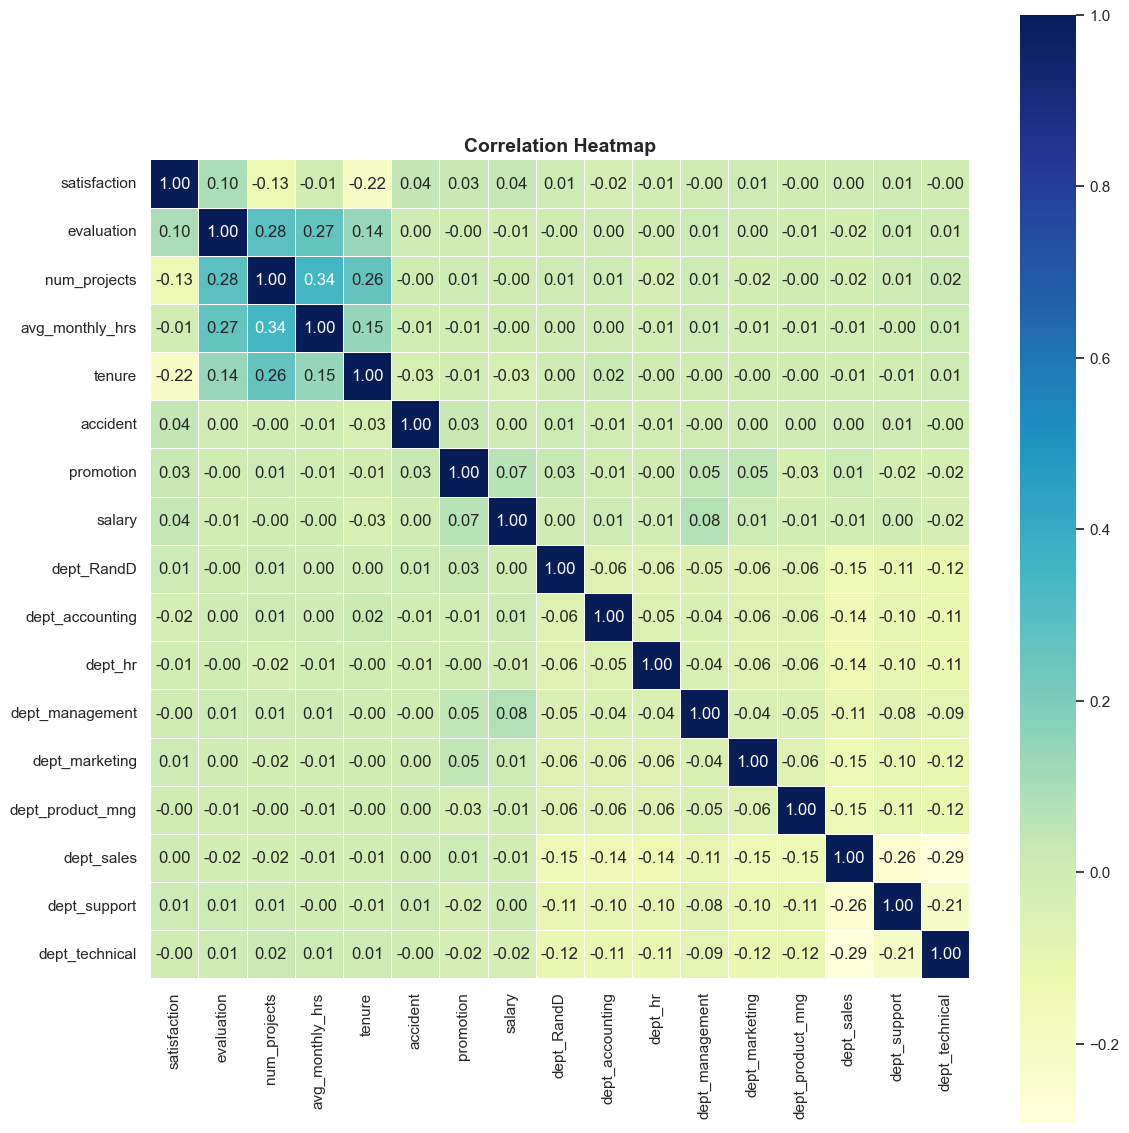

In [25]:
plt.figure(figsize=(12, 12))
sns.heatmap(df1_lr.drop(columns="left").corr(numeric_only=True), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, square=True,)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##### **Output Summary**
- The correlation coefficients between features range from -0.29 to 0.34, indicating weak to moderate relationships. No values approach ±1, meaning there is no strong collinearity between predictors.  

- The assumption of low multicollinearity for logistic regression is satisfied, ensuring more stable and reliable coefficient estimates.

#### **Separating Target Variable and Feature Set for Model Training**

Before training a machine learning model, we must split our dataset into two parts:

- Target variable (y) – the column we want to predict (in this case, employee attrition status "left").

- Feature set (X) – all other columns that will be used to make predictions.

This separation ensures the model learns patterns from the independent variables and predicts the dependent variable correctly.

In [26]:
# Separating the target variable (y) and feature set (X) for model training

# Target variable: 'left' column, indicating if an employee left (1) or stayed (0)
y = df1_lr["left"]

# Feature set: all columns except 'left'
X = df1_lr.drop("left", axis=1)


##### **Summary:**

- y contains a single column (left) with binary values (0 or 1).

- X contains all other independent features used for predicting attrition.

- This separation is a standard preprocessing step before fitting any classification model.

---

#### **Scaling `avg_monthly_hrs` Using Min-Max Normalization**

This code normalizes the avg_monthly_hrs feature to a range between 0 and 1 using the Min-Max Scaler. Scaling helps ensure that features with different scales do not dominate the learning process in machine learning models. This step is particularly useful when the model is sensitive to the magnitude of features (e.g. Logistic Regression).

In [27]:
# Initialize the MinMaxScaler (scales values between 0 and 1 by default)
scaler = MinMaxScaler()

# Fit the scaler on 'avg_monthly_hrs' and transform it
# The transformation rescales the values so that the minimum becomes 0 and the maximum becomes 1
X["avg_monthly_hrs"] = scaler.fit_transform(X[["avg_monthly_hrs"]])


##### **Summary**
- The `avg_monthly_hrs` feature is scaled to a [0, 1] range using MinMaxScaler.  
- This ensures that the variable is on a comparable scale with other features,
preventing features with larger values from disproportionately influencing the logistic regression model.


---

#### **Splitting Dataset into Training and Testing Sets with Stratification**

This step divides the dataset into training (75%) and testing (25%) subsets. Stratification is applied to ensure that the proportion of target classes (y) remains consistent across both sets, preventing imbalanced class distributions in the training or testing data. This is essential for reliable model evaluation.

In [28]:
# Splitting the dataset into training and testing sets (75% train, 25% test) 
# with stratification to preserve the class distribution

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

##### **Summary:**

- Training set: 8,375 samples (75% of total)

- Testing set: 2,792 samples (25% of total)

- Class distribution remains consistent between training and testing sets due to stratification.

---

### **1. Building the Logistic Regression Model**


Logistic Regression is used here as a baseline classification model to predict employee attrition based on historical features. This model estimates the probability of an employee leaving (target = 1) using a linear combination of input features and a logistic function. It’s simple, interpretable, and effective for identifying key factors influencing attrition.
Basic linear model without handling class imbalance.

In [29]:
# Initializing the Logistic Regression model with increased max_iter to ensure convergence
logit_model = LogisticRegression(max_iter=1000)

In [30]:
# Fitting the logistic regression model to the training features (X_train) and target (y_train)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Generating predictions on the test set and printing the classification metrics report.
y_pred = logit_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.8615    0.9328    0.8957      2321
           1     0.4409    0.2611    0.3280       471

    accuracy                         0.8195      2792
   macro avg     0.6512    0.5970    0.6119      2792
weighted avg     0.7906    0.8195    0.8000      2792



##### **Conclusion**  
The model achieved low recall (0.26) for the minority class, meaning it failed to correctly identify many actual positive cases. Precision was also low (0.44), leading to overall weak performance (F1 = 0.33). This makes it unsuitable for detecting rare events in this dataset.



---

#### **SMOTE for class Imbalance**
**Why I used SMOTE for attrition prediction**  

- In my dataset, employees who left the company made up only ~17% of all records, creating a strong class imbalance. This imbalance caused the model to prioritize predicting “Stayed” employees, resulting in poor recall for the “Left” class.
- I applied SMOTE to balance the dataset so the model would learn patterns for both classes equally, improving its ability to detect at-risk employees.

**What I expected before applying SMOTE**  

- Before applying SMOTE, I anticipated that balancing the classes would:
- Increase recall for the “Left” class (catch more leavers)
- Slightly reduce recall for the “Stayed” class due to more aggressive predictions of “Left”
- Keep overall accuracy similar, but improve the F1-score for the minority class — making the model more useful for HR retention strategies.

In [35]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X_train, y_train)  # type: ignore

In [36]:
pd.Series(y_res).value_counts(normalize=True) * 100  # type: ignore

left
0    50.0
1    50.0
Name: proportion, dtype: float64

---

### **2. SMOTE + Logistic Regression**


To address the class imbalance in the dataset, the Synthetic Minority Oversampling Technique (SMOTE) is applied to generate synthetic samples for the minority class. This helps the Logistic Regression model learn patterns from both classes more effectively, reducing bias toward the majority class and potentially improving recall for the minority class. The balanced dataset is then used to train the model for predicting employee attrition.

In [37]:
smote_logit_model = LogisticRegression()
smote_logit_model.fit(X_res, y_res)

LogisticRegression()

In [38]:
y_pred2 = smote_logit_model.predict(X_test)
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2321
           1       0.48      0.90      0.63       471

    accuracy                           0.82      2792
   macro avg       0.73      0.85      0.75      2792
weighted avg       0.89      0.82      0.84      2792



##### **Conclusion:**  
Applying SMOTE significantly improved the model’s ability to detect attrition cases, with recall for the “Left” class increasing from 0.26 to 0.90 and F1-score from 0.33 to 0.63. This improvement came at the cost of reduced recall for the “Stayed” class (0.93 → 0.80), indicating more false positives. Overall, SMOTE enhanced minority class detection, making the model better suited for identifying at-risk employees in retention-focused strategies.

---

### **3. Baseline Decision Tree**
Untuned decision tree on original imbalanced dataset.

In [40]:
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)
dt_pred = dt_baseline.predict(X_test)

In [41]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2321
           1       0.89      0.94      0.91       471

    accuracy                           0.97      2792
   macro avg       0.94      0.96      0.95      2792
weighted avg       0.97      0.97      0.97      2792



##### **Conclusion:**
The model achieved high overall metrics (F1 = 0.91) with good precision (0.89) and recall (0.94). However, given the class imbalance, this performance may be biased towards the majority class and could overfit.

---

### **4. Balanced Decision Tree**
Decision tree with class_weight="balanced" to address imbalance.


In [42]:
dt_balanced = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt_balanced.fit(X_train, y_train)

y_pred_balanced = dt_balanced.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2321
           1       0.92      0.94      0.93       471

    accuracy                           0.98      2792
   macro avg       0.95      0.96      0.96      2792
weighted avg       0.98      0.98      0.98      2792



##### **Conclusion:**
Balancing improved minority class recognition while maintaining strong precision (0.92) and recall (0.94). The F1 score (0.93) indicates robust performance across both classes without relying on oversampling.

----

### **5. SMOTE + Decision Tree**
Decision tree after SMOTE oversampling.

In [44]:
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_res, y_res)
y_pred_smote = dt_smote.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2321
           1       0.78      0.94      0.86       471

    accuracy                           0.95      2792
   macro avg       0.89      0.95      0.91      2792
weighted avg       0.95      0.95      0.95      2792



##### **Conclusion:**  
 This approach boosted recall (0.94) but reduced precision (0.78), showing a tendency to predict more positives. The F1 score (0.86) reflects a recall-prioritized trade-off.

----

### **6. Tuned Balanced Decision Tree**
Hyperparameter-tuned balanced decision tree.

In [46]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [47]:
tuned_balanced_dt = DecisionTreeClassifier(random_state=0, class_weight="balanced")

dt_clf = GridSearchCV(tuned_balanced_dt, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

dt_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [49]:
tuned_y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, tuned_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2321
           1       0.93      0.93      0.93       471

    accuracy                           0.98      2792
   macro avg       0.96      0.96      0.96      2792
weighted avg       0.98      0.98      0.98      2792



##### **Conclusion:**
Tuning improved precision (0.93) and kept recall high (0.93), yielding an F1 score of 0.93. This model achieves a balanced and consistent performance across both classes.



---

### **7.  Tuned Random Forest**
Hyperparameter-optimized random forest.

In [50]:
rf_clf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_cv = GridSearchCV(rf_clf, cv_params, scoring=scoring, cv=5, refit='f1', n_jobs=-1)

In [56]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [57]:
with open('rf_cv_model_1.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [58]:
with open('rf_cv_model_1.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [59]:
rf_y_pred = rf_cv.predict(X_test)

In [60]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.99      0.93      0.96       471

    accuracy                           0.99      2792
   macro avg       0.99      0.96      0.98      2792
weighted avg       0.99      0.99      0.99      2792



##### **Conclusion:**
The model achieved near-perfect precision (0.99) and strong recall (0.93), leading to an F1 score of 0.96. It demonstrates excellent ability to correctly classify both classes with minimal false positives.

---

### **8.  Balanced Random Forest**
Random forest with `class_weight="balanced"`.

In [61]:
balanced_rf_clf = RandomForestClassifier(random_state=0, 
                                         class_weight="balanced", 
                                         max_features=4, 
                                         min_samples_split=3, 
                                         n_estimators=75)


In [62]:
balanced_rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=4,
                       min_samples_split=3, n_estimators=75, random_state=0)

In [63]:
balanced_rf_y_pred = balanced_rf_clf.predict(X_test)

In [64]:
print(classification_report(y_test, balanced_rf_y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2321
           1       0.99      0.92      0.95       471

    accuracy                           0.98      2792
   macro avg       0.99      0.96      0.97      2792
weighted avg       0.99      0.98      0.98      2792



##### **Conclusion:**
Performance matched the tuned random forest (F1 = 0.96), maintaining extremely high precision and strong recall. This confirms the algorithm’s robustness even without oversampling.

---

### **9. XGBoost Classifier**
Gradient boosting with tuned parameters.

In [65]:
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=0)

xgb_cv_params = {
    'max_depth': [3, 5, 7],                  
    'min_child_weight': [1, 3],           
    'learning_rate': [0.1, 0.2],          
    'n_estimators': [50, 100, 150],            
    'subsample': [0.8],                   
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1]          
}


In [66]:
xgb_cv = GridSearchCV(xgb_clf, xgb_cv_params, scoring=scoring, cv=5, refit='f1', n_jobs=-1)

In [67]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3],
                         'n_estimators': [50, 100, 150], 'subsample': [0.8]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.99      0.93      0.96       471

    accuracy                           0.99      2792
   macro avg       0.99      0.97      0.98      2792
weighted avg       0.99      0.99      0.99      2792



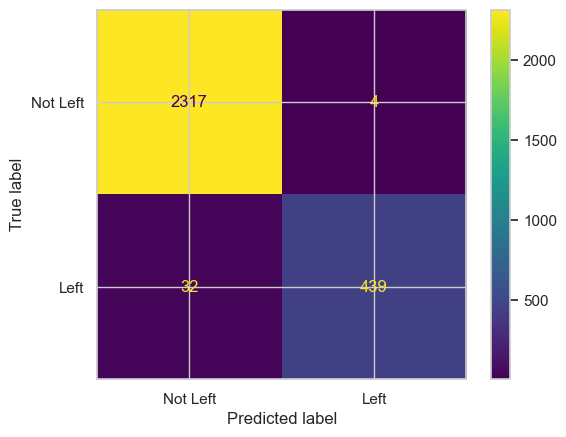

In [280]:
xgb_y_pred = xgb_cv.predict(X_test)
print(classification_report(y_test, xgb_y_pred))

cm = confusion_matrix(y_test, xgb_y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Left", "Left"])

disp.plot()
plt.show()

##### **Conclusion:**
XGBoost delivered the best overall performance (F1 = 0.96) with very high precision (0.99) and recall (0.93). Its boosting mechanism effectively handled class imbalance and complex patterns.

---

## **Model Comparison**


This section compares the performance of all trained models using key evaluation metrics such as precision, recall, and F1-score. The goal is to identify the model that best balances predictive performance and generalization capability, while considering the specific requirements of the classification task.

In [ ]:
logit_report = classification_report(y_test, y_pred, output_dict=True)
smote_logit_report = classification_report(y_test, y_pred2, output_dict=True)
basline_dt_report = classification_report(y_test, dt_pred, output_dict=True)
balanced_dt_report = classification_report(y_test, y_pred_balanced, output_dict=True)
smote_dt_report = classification_report(y_test, y_pred_smote, output_dict=True)
tuned_balanced_dt_report = classification_report(y_test, tuned_y_pred, output_dict=True)
tuned_rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
balanced_rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
xgb_report = classification_report(y_test, xgb_y_pred, output_dict=True)


results = {
    "Logistic": logit_report['1'], # type: ignore
    "SMOTE Logistic": smote_logit_report['1'], # type: ignore
    "Baseline DT": basline_dt_report['1'],  # type: ignore
    "Balanced DT": balanced_dt_report['1'], # type: ignore
    "SMOTE DT": smote_dt_report['1'], # type: ignore
    "Tuned Balanced DT": tuned_balanced_dt_report['1'], # type: ignore
    "Tuned_RandomForest" : tuned_rf_report['1'], # type: ignore
    "Balanced_RandomForest": balanced_rf_report['1'], # type: ignore
    "XGBoost": xgb_report['1']  # type: ignore

}

df_class1 = pd.DataFrame(results).T  # Transpose so models are rows
df_class1 = df_class1[['precision', 'recall', 'f1-score']]  # Keep only desired metrics

print(df_class1)


                       precision    recall  f1-score
Logistic                0.440860  0.261146  0.328000
SMOTE Logistic          0.481314  0.902335  0.627770
Baseline DT             0.887550  0.938429  0.912281
Balanced DT             0.917012  0.938429  0.927597
SMOTE DT                0.784832  0.944798  0.857418
Tuned Balanced DT       0.926160  0.932059  0.929101
Tuned_RandomForest      0.993166  0.925690  0.958242
Balanced_RandomForest   0.993166  0.925690  0.958242
XGBoost                 0.990971  0.932059  0.960613


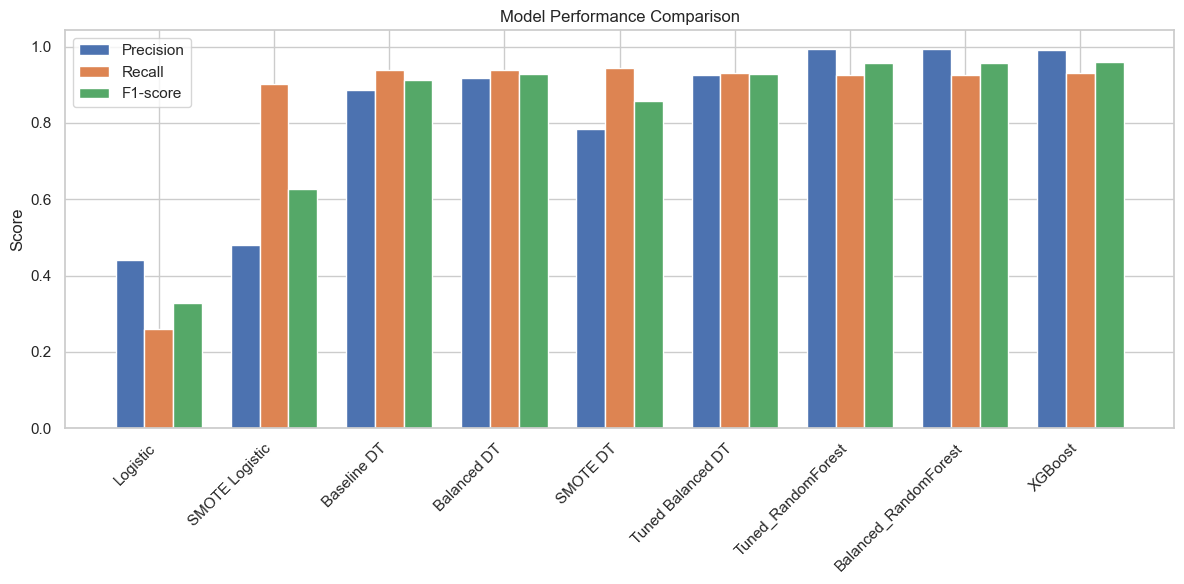

In [ ]:
# Data
data = {
    'Model': [
        'Logistic', 'SMOTE Logistic', 'Baseline DT', 'Balanced DT',
        'SMOTE DT', 'Tuned Balanced DT', 'Tuned_RandomForest',
        'Balanced_RandomForest', 'XGBoost'
    ],
    'Precision': [0.4409, 0.4813, 0.8876, 0.9170, 0.7848, 0.9262, 0.9932, 0.9932, 0.9910],
    'Recall': [0.2611, 0.9023, 0.9384, 0.9384, 0.9448, 0.9321, 0.9257, 0.9257, 0.9321],
    'F1-score': [0.3280, 0.6278, 0.9123, 0.9276, 0.8574, 0.9291, 0.9582, 0.9582, 0.9606]
}

df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
x = range(len(df))

ax.bar([p - bar_width for p in x], df['Precision'], width=bar_width, label='Precision')
ax.bar(x, df['Recall'], width=bar_width, label='Recall')
ax.bar([p + bar_width for p in x], df['F1-score'], width=bar_width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(df['Model'], rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()


**Insights:**  
Among all tested models, XGBoost achieved the highest F1-score (0.9606), slightly outperforming the tuned and balanced Random Forest models. This indicates that XGBoost offered the best trade-off between precision (99.10%) and recall (93.21%). The Tuned Balanced Decision Tree also performed strongly (F1: 0.9291) while maintaining simplicity. Logistic regression models, even with SMOTE, lagged behind in performance, suggesting that linear decision boundaries were insufficient for this dataset. Overall, tree-based ensemble methods, especially gradient boosting, proved most effective in capturing the data’s complexity.

In [39]:
plot_importance(xgb_cv.best_estimator_)
plt.show()

NameError: name 'xgb_cv' is not defined

---

## **Champion Model for Attrition Prediction**
### **Model Chosen: XGBoost Classifier**
#### **Reason for Selection:**

- Achieved the highest overall performance (F1-score = 0.9606) among all tested models.

- Balanced precision (0.9910) and recall (0.9321) for the "Attrition" class, ensuring both accuracy and reduced false negatives (critical in employee retention).

- Robust to class imbalance without heavy oversampling.

#### **Performance Metrics:**
| Metric    | Score                          |
| --------- | ------------------------------ |
| Precision | 0.9910                         |
| Recall    | 0.9321                         |
| F1-score  | 0.9606                         |
| Accuracy  | 9.9931 |


#### **Business Impact:**
Correctly identifies employees at high risk of leaving, enabling proactive retention strategies.

Low false negatives mean fewer at-risk employees are missed, reducing attrition costs.

#### **Feature Insights:**

Top drivers of attrition identified by the model:

1. **Average Monthly Hours (`avg_monthly_hrs`)** – Employees with unusually high working hours show higher attrition risk, possibly due to burnout.

2. **Satisfaction Level (`satisfaction`)** – Low satisfaction strongly correlates with leaving; improving employee engagement could reduce turnover.

3. **Last Evaluation Score (`evaluation`)** – Both extremely low and extremely high evaluations are linked to higher attrition, suggesting disengagement or overwork.

4. **Number of Projects (`num_projects`)** – Handling many projects can increase stress and attrition risk, indicating the importance of workload balance.

5. **Tenure (`tenure`)** – Employees with fewer years at the company are more likely to leave, emphasizing the need for better early-career retention strategies.

#### **Suggestions Based on Feature Insights:**

**1. Average Monthly Hours (avg_monthly_hrs):**

- Monitor and manage extreme workloads; extremely high or low work hours may increase attrition risk.

- Encourage balanced work schedules to avoid burnout while maintaining productivity.

**2. Satisfaction Level (satisfaction):**

- Conduct regular satisfaction surveys and address top concerns.

- Improve recognition programs, career development opportunities, and work-life balance initiatives.

**3. Last Evaluation Score (evaluation):**

- Provide constructive feedback and growth plans for low-performing employees.

- Avoid overburdening high performers to prevent disengagement despite good performance.

**4. Number of Projects (num_projects):**

- Review project allocation to ensure employees are neither underutilized nor overloaded.

- Assign projects matching employees’ strengths to improve engagement and retention.

**5. Tenure (tenure):**

- Offer milestone-based incentives to retain mid-tenure employees (who may be at higher risk of leaving).

- Provide clear career progression pathways to encourage long-term commitment.



---

## **Key Takeaway**

**"XGBoost emerged as the most effective model (F1: 0.9606), enabling HR to accurately identify at-risk employees and uncover key attrition drivers — empowering targeted interventions to reduce turnover."**

___